# Ryan Gough

## Neural Network Classifiers

###### 1. Neural Network Classifier with Scikit
Using the multi-label classifier dataset from earlier exercises (categorized-comments.jsonl in the reddit folder), fit a neural network classifier using scikit-learn. Use the code found in chapter 12 of the Applied Text Analysis with Python book as a guideline. Report the accuracy, precision, recall, F1-score, and confusion matrix.

###### 2. Neural Network Classifier with Keras
Using the multi-label classifier dataset from earlier exercises (categorized-comments.jsonl in the reddit folder), fit a neural network classifier using Keras. Use the code found in chapter 12 of the Applied Text Analysis with Python book as a guideline. Report the accuracy, precision, recall, F1-score, and confusion matrix.

### Library Preparation

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import sklearn
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import tensorflow as tf

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ryangough/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
2022-06-30 13:07:04.661179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras import Sequential

In [3]:
from tensorflow.keras.layers import Layer

In [4]:
from tensorflow.keras import layers

In [5]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

### Step 1: Load the data into a dataframe.

In [6]:
# Load data into a dataframe
data = pd.read_json("/Users/ryangough/Downloads/categorized-comments.jsonl", lines=True, nrows = 606475)

In [7]:
# Examining Data
data.head(10)

,cat,txt
0,sports,Barely better than Gabbert? He was significant...
1,sports,Fuck the ducks and the Angels! But welcome to ...
2,sports,Should have drafted more WRs.\n\n- Matt Millen...
3,sports,[Done](https://i.imgur.com/2YZ90pm.jpg)
4,sports,No!! NOO!!!!!
5,sports,Ding dong the Kaepers gone!!!!!! Yes!!!! Frida...
6,sports,yup\n\nThat would be best case scenario. Still...
7,sports,I think Larry Kruger made a good point on KNBR...
8,sports,This is great to have two well-regarded RB coa...
9,sports,7-9 next season confirmed.


In [8]:
# Assessing n for different categories. 
data.cat.value_counts()

video_games               435541
sports                    145823
science_and_technology     25111
Name: cat, dtype: int64

###### Going to sample the data into a lower quantity and remeasure the value counts.

In [9]:
# Taking a sample of the data.
df = data.sample(5000)

In [10]:
# New value counts. 
df.cat.value_counts()

video_games               3582
sports                    1189
science_and_technology     229
Name: cat, dtype: int64

###### Preproccesing the data.

In [11]:
# Converting all text to lowercase.
df["txt"] = df["txt"].str.lower()
df.head(10)

,cat,txt
174561,video_games,[deleted]
448547,video_games,[removed]
281711,video_games,"no, you can't argue that mass effect is not an..."
430623,video_games,"are you talking about you, your family, or wha..."
242114,sports,"this. i have sbc dybala, and i absolutely love..."
198693,video_games,i like and dislike that route. one of the reas...
564767,video_games,"if zarya tracer combo is ""big bang"" then what ..."
317045,video_games,just record it with the share button if you're...
535354,video_games,well that could still be enough to fuck with h...
281119,video_games,it's not developed by double fine at all.


In [12]:
# Removing punctuation using string.punctuations and join().

# The function joins each string if it's not a punctuation.

df['txt'] = df['txt'].apply(lambda x: "".join([i for i in x if i not in string.punctuation]))
df.head(10)

,cat,txt
174561,video_games,deleted
448547,video_games,removed
281711,video_games,no you cant argue that mass effect is not an r...
430623,video_games,are you talking about you your family or what ...
242114,sports,this i have sbc dybala and i absolutely love h...
198693,video_games,i like and dislike that route one of the reaso...
564767,video_games,if zarya tracer combo is big bang then what is...
317045,video_games,just record it with the share button if youre ...
535354,video_games,well that could still be enough to fuck with h...
281119,video_games,its not developed by double fine at all


In [13]:
# Computing the number of stopwords in each row text and making a new column with its respective frequency. 
stop = stopwords.words('english')

df['stopwords'] = df['txt'].apply(lambda x: len([i for i in x.split() if i in stop]))
df[['txt','stopwords']].head(10)

,txt,stopwords
174561,deleted,0
448547,removed,0
281711,no you cant argue that mass effect is not an r...,9
430623,are you talking about you your family or what ...,9
242114,this i have sbc dybala and i absolutely love h...,40
198693,i like and dislike that route one of the reaso...,20
564767,if zarya tracer combo is big bang then what is...,13
317045,just record it with the share button if youre ...,6
535354,well that could still be enough to fuck with h...,11
281119,its not developed by double fine at all,5


In [14]:
# Removing stop words from each row.
df['txt'] = df['txt'].apply(lambda x: " ".join(i for i in x.split() if i not in stop))
df['txt'].head(10)

174561                                              deleted
448547                                              removed
281711    cant argue mass effect rpg bud id kind like se...
430623             talking family youve seen general public
242114    sbc dybala absolutely love like card also card...
198693    like dislike route one reasons prefer dota lol...
564767    zarya tracer combo big bang zarya dva combo ce...
317045                        record share button youre ps4
535354    well could still enough fuck im 100 sure would...
281119                                developed double fine
Name: txt, dtype: object

In [15]:
# Ensuring the removal of all stop words.
df['stopwords'] = df['txt'].apply(lambda x: len([i for i in x.split() if i in stop]))
df[['txt','stopwords']].head(10)

,txt,stopwords
174561,deleted,0
448547,removed,0
281711,cant argue mass effect rpg bud id kind like se...,0
430623,talking family youve seen general public,0
242114,sbc dybala absolutely love like card also card...,0
198693,like dislike route one reasons prefer dota lol...,0
564767,zarya tracer combo big bang zarya dva combo ce...,0
317045,record share button youre ps4,0
535354,well could still enough fuck im 100 sure would...,0
281119,developed double fine,0


In [16]:
# Apply NLTK’s PorterStemmer

porter = PorterStemmer()
df['txt'] = df['txt'].apply(lambda x: " ".join([porter.stem(word) for word in x.split()]))
df['txt'].head(10)

174561                                                delet
448547                                                remov
281711    cant argu mass effect rpg bud id kind like see...
430623                   talk famili youv seen gener public
242114    sbc dybala absolut love like card also card lo...
198693    like dislik rout one reason prefer dota lol ro...
564767    zarya tracer combo big bang zarya dva combo ce...
317045                         record share button your ps4
535354    well could still enough fuck im 100 sure would...
281119                                   develop doubl fine
Name: txt, dtype: object

In [17]:
# Substituting the categories in the cat column for numerical values to be used for analysis. 
df = df.replace({'cat': {'video_games': 0, 'sports': 1, 'science_and_technology':2}})
df['cat']= df['cat'].astype(int)

In [18]:
df = df[['cat', 'txt']]

In [19]:
sample = df.sample(n=2000)
sample.shape

(2000, 2)

###### Final processing steps. 

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sample['txt'], sample['cat'], random_state = 0)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1500, 4725)

# 1) Neural Network Classifier with Scikit

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import classification_report

In [24]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MLPClassifier(hidden_layer_sizes =[50,150], verbose = True))])

text_clf = text_clf.fit(X_train, y_train)

Iteration 1, loss = 1.09908063
Iteration 2, loss = 1.00096072
Iteration 3, loss = 0.89779843
Iteration 4, loss = 0.79527245
Iteration 5, loss = 0.71132160
Iteration 6, loss = 0.65518963
Iteration 7, loss = 0.60296725
Iteration 8, loss = 0.54279785
Iteration 9, loss = 0.47656666
Iteration 10, loss = 0.40785157
Iteration 11, loss = 0.34140983
Iteration 12, loss = 0.28058408
Iteration 13, loss = 0.23085377
Iteration 14, loss = 0.18997826
Iteration 15, loss = 0.15802312
Iteration 16, loss = 0.13287041
Iteration 17, loss = 0.11419450
Iteration 18, loss = 0.09989653
Iteration 19, loss = 0.08823146
Iteration 20, loss = 0.08018720
Iteration 21, loss = 0.07309155
Iteration 22, loss = 0.06911666
Iteration 23, loss = 0.06512942
Iteration 24, loss = 0.06185266
Iteration 25, loss = 0.05957540
Iteration 26, loss = 0.05779531
Iteration 27, loss = 0.05669839
Iteration 28, loss = 0.05545734
Iteration 29, loss = 0.05420760
Iteration 30, loss = 0.05349419
Iteration 31, loss = 0.05264020
Iteration 32, los

In [25]:
y_hat = text_clf.predict(X_test)

In [26]:
from sklearn.metrics import f1_score, precision_score, recall_score
f1 = f1_score(y_test, y_hat, average='macro')
recall = recall_score(y_test, y_hat, average='macro')
precision = precision_score(y_test, y_hat, average='macro')
accuracy = text_clf.score(X_test, y_test)

In [27]:
print("Accuracy score: {}".format(accuracy))
print("Precision score: {}".format(precision))
print("Recall score: {}".format(recall))
print("F1 score: {}".format(f1))

Accuracy score: 0.716
Precision score: 0.47796273177047205
Recall score: 0.43014048531289917
F1 score: 0.4380785376481216


In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

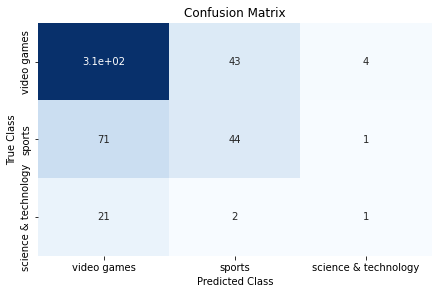

In [29]:
# visualizing the Score
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 20

matrix = confusion_matrix(y_test, y_hat)
class_names = ['video games', 'sports', 'science & technology']
# Create pandas dataframe
dataframe = pd.DataFrame(matrix,index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

# 2) Neural Network Classifier with Keras

In [30]:
from tensorflow.keras.layers import Dense

In [31]:
input_dim = X_train_tfidf.shape[1]
input_dim

4725

In [32]:
def build_network():
    """
    Create a function that returns a compiled neural network
    """
    nn = Sequential()
    nn.add(Dense(500, activation='relu', input_shape=(input_dim,)))
    nn.add(Dense(150, activation='relu'))
    nn.add(Dense(3, activation='softmax'))
    nn.compile(
         loss='categorical_crossentropy',
         optimizer='adam',
         metrics=['accuracy']
    )
    return nn

In [33]:
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
vectorizer = TfidfVectorizer(max_features=input_dim)

 

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train = convert_sparse_matrix_to_sparse_tensor(X_train)
X_test = convert_sparse_matrix_to_sparse_tensor(X_test)

2022-06-30 13:07:47.270078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([#('vect', CountVectorizer()),
                     #('tfidf', TfidfTransformer()),
                     ('clf2', KerasClassifier(build_fn = build_network, 
                                              epochs = 50, batch_size = 128))])

text_clf = text_clf.fit(X_train, y_train)

Epoch 1/50
12/12 [==============================] - 1s 22ms/step - loss: 0.9657 - accuracy: 0.6740
Epoch 2/50
12/12 [==============================] - 0s 23ms/step - loss: 0.6888 - accuracy: 0.7047
Epoch 3/50
12/12 [==============================] - 0s 21ms/step - loss: 0.5492 - accuracy: 0.7053
Epoch 4/50
12/12 [==============================] - 0s 22ms/step - loss: 0.4058 - accuracy: 0.8000
Epoch 5/50
12/12 [==============================] - 0s 22ms/step - loss: 0.2717 - accuracy: 0.9200
Epoch 6/50
12/12 [==============================] - 0s 22ms/step - loss: 0.1795 - accuracy: 0.9333
Epoch 7/50
12/12 [==============================] - 0s 21ms/step - loss: 0.1347 - accuracy: 0.9360
Epoch 8/50
12/12 [==============================] - 0s 20ms/step - loss: 0.1136 - accuracy: 0.9367
Epoch 9/50
12/12 [==============================] - 0s 22ms/step - loss: 0.0976 - accuracy: 0.9607
Epoch 10/50
12/12 [==============================] - 0s 21ms/step - loss: 0.0847 - accuracy: 0.9747
Epoch 11/

In [37]:
y_hat = text_clf.predict(X_test)

16/16 [==============================] - 0s 1ms/step


In [38]:
f1 = f1_score(y_test, y_hat, average='macro')
recall = recall_score(y_test, y_hat, average='macro')
precision = precision_score(y_test, y_hat, average='macro')
accuracy = text_clf.score(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 1.3128 - accuracy: 0.7140


In [39]:
print("Accuracy score: {}".format(accuracy))
print("Precision score: {}".format(precision))
print("Recall score: {}".format(recall))
print("F1 score: {}".format(f1))

Accuracy score: 0.7139999866485596
Precision score: 0.4732890499194847
Recall score: 0.41947637292464884
F1 score: 0.4279157657895199


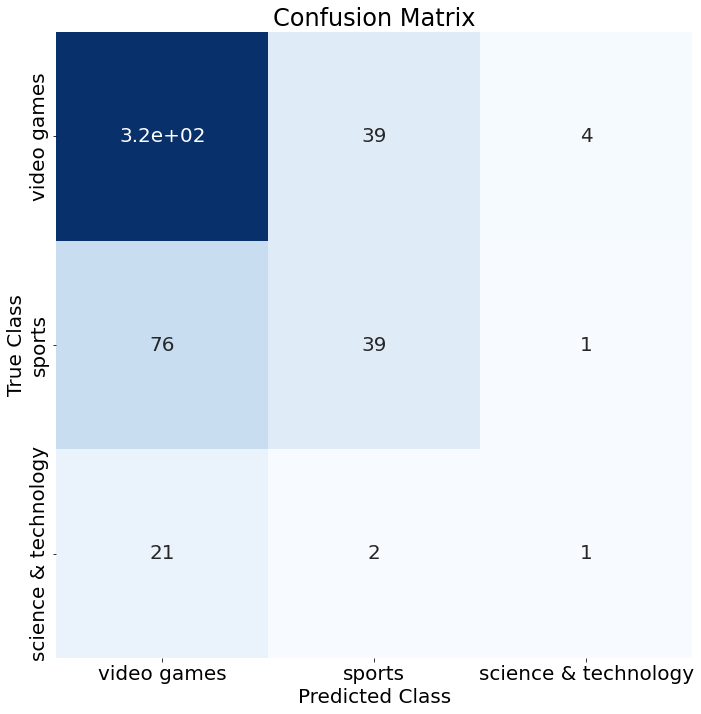

In [40]:
# visualizing the Score
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 20

matrix = confusion_matrix(y_test, y_hat)
class_names = ['video games', 'sports', 'science & technology']
# Create pandas dataframe
dataframe = pd.DataFrame(matrix,index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()